In [ ]:
t = [1804, 1927, 1960, 1974, 1987, 1999, 2009, 2025, 2050]
P = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.77, 7.95, 9.32]

In [ ]:
len(t)

In [ ]:
def L(x, k, n, arr):
    result = 1
    for ii in range(0, n + 1):
        if ii == k:
            continue
        # Here I changed ii->arr[ii] and k->arr[k]
        result *= (x - t[arr[ii]])/(t[arr[k]] - t[arr[ii]])
    return result
def pol(x, arr):
    # Degree of the polynomial
    n = len(arr) - 1
    suma = 0
    for ii in range(0, n + 1):
        # Here I changed P[ii] to P[arr[ii]]
        suma += P[arr[ii]] * L(x, ii, n, arr)
    return suma

In [ ]:
lista = [ii for ii in range(0,7)]
lista

In [ ]:
for ii in range(0,7):
    print(pol(t[ii], lista))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_poly(arr):
    plt.plot(t, P, "o")
    r = np.linspace(t[0], t[-1])
    plt.plot(r, [pol(x, arr) for x in r])

In [ ]:
plot_poly([0,2,6])

# Fourth class

In [1]:
t = [1804, 1927, 1960, 1974, 1987, 1999, 2009, 2025, 2050]
P = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.77, 7.95, 9.32]

In [9]:
Y = [[1, ii] for ii in t]
print(Y)

[[1, 1804], [1, 1927], [1, 1960], [1, 1974], [1, 1987], [1, 1999], [1, 2009], [1, 2025], [1, 2050]]


### Numpy

In [4]:
import numpy as np # as: pseudonim

In [10]:
X = np.array(Y)

In [29]:
X

array([[   1, 1804],
       [   1, 1927],
       [   1, 1960],
       [   1, 1974],
       [   1, 1987],
       [   1, 1999],
       [   1, 2009],
       [   1, 2025],
       [   1, 2050]])

In [14]:
X + X

array([[   2, 3608],
       [   2, 3854],
       [   2, 3920],
       [   2, 3948],
       [   2, 3974],
       [   2, 3998],
       [   2, 4018],
       [   2, 4050],
       [   2, 4100]])

In [17]:
np.linalg.norm(X)

np.float64(5915.184358919001)

In [20]:
np.sum(X ** 2)**.5

np.float64(5915.184358919001)

In [22]:
## Transpose
X.T

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1],
       [1804, 1927, 1960, 1974, 1987, 1999, 2009, 2025, 2050]])

In [23]:
## Matrix product
X.T @ X # Matrix product

array([[       9,    17735],
       [   17735, 34989397]])

In [24]:
inv = np.linalg.inv(X.T @ X)#Inverse of a matrix
inv

array([[ 9.34675676e+01, -4.73757039e-02],
       [-4.73757039e-02,  2.40418007e-05]])

In [25]:
y = np.array(P)

In [27]:
a = inv @ X.T @ y

In [28]:
a

array([-6.20254387e+01,  3.40157287e-02])

In [ ]:
import matplotlib.pyplot as plt

In [44]:
# Data transformation
X = np.array(Y)
t2 = np.array(t) ** 2
t2 = t2.reshape(len(t2), 1)
X = np.hstack((X, t2))

# Model fitting
y = np.array(P)
a = np.linalg.inv(X.T @ X) @ X.T @ y
a

array([ 7.59251603e+02, -8.21745024e-01,  2.22508081e-04])

In [47]:
arr = np.linspace(t[0], t[-1], 50)
ymod = a[0] * np.ones(50)
for ii in range(1, len(a)):
    ymod = ymod + a[ii] * arr ** ii

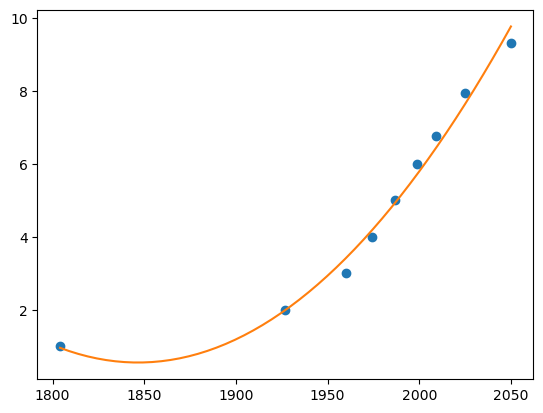

In [49]:
plt.plot(t, P, "o")
plt.plot(arr, ymod)

In [50]:
from sklearn import datasets

In [65]:
data = datasets.load_diabetes()
X = data["data"]
y = data["target"]

X = np.hstack((np.ones((len(X), 1)), X))
a = np.linalg.inv(X.T @ X) @ X.T @ y
a

array([ 152.13348416,  -10.0098663 , -239.81564367,  519.84592005,
        324.3846455 , -792.17563855,  476.73902101,  101.04326794,
        177.06323767,  751.27369956,   67.62669218])

In [68]:
data["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [78]:
e = (y - X @ a)/(X @ a)

(array([ 1.,  2.,  3.,  9.,  5.,  8., 12., 20., 14., 24., 18., 17., 21.,
        20., 28., 16., 24., 21., 23., 24., 21., 19., 16., 15.,  8., 13.,
         7.,  7.,  6.,  2.,  4.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-0.82909403, -0.77791306, -0.72673209, -0.67555111, -0.62437014,
        -0.57318917, -0.5220082 , -0.47082723, -0.41964626, -0.36846529,
        -0.31728432, -0.26610335, -0.21492238, -0.1637414 , -0.11256043,
        -0.06137946, -0.01019849,  0.04098248,  0.09216345,  0.14334442,
         0.19452539,  0.24570636,  0.29688733,  0.34806831,  0.39924928,
         0.45043025,  0.50161122,  0.55279219,  0.60397316,  0.65515413,
         0.7063351 ,  0.75751607,  0.80869704,  0.85987802,  0.91105899,
         0.96223996,  1.01342093,  1.0646019 ,  1.11578287,  1.16696384,
         1.21814481,  1.26932578,  1.32050675,  1.37168773,  1.4228687 ,
         1.47404967,  1.52523064,  1.57641161,  1.62759258,

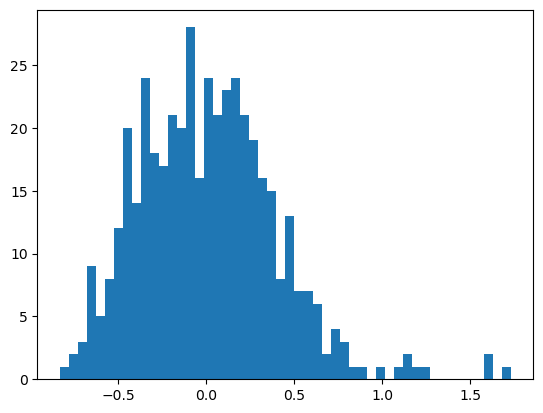

In [83]:
plt.hist(e, bins = 50)

In [84]:
import statsmodels.api as sm

In [87]:
model = sm.OLS(y, X).fit()

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           3.83e-62
Time:                        20:01:01   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
x1           -10.0099     59.749     -0.168      0.867    -127.446     107.426
x2          -239.8156     61.222     -3.917      0.000    -360.147    -119.484
x3           519.8459     66.533      7.813      0.000     389.076     650.616
x4           324.3846     65.422      4.958      0.000     195.799     452.970
x5          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
x6           476.7390    339.030      1.406      0.160    -189.620    1143.098
x7           101.0433    212.531      0.475      0.635    -316.684     518.770
x8           177.0632    161.476      1.097      0.273    -140.315     494.441
x9           751.2737    171.900      4.370      0.000     413.407    1089.140
x10           67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Coefficients
coefficients = model.params

In [103]:
Y = np.hstack((X[:, 0].reshape(len(X), 1), X[:,2:]))

In [105]:
model = sm.OLS(y, Y).fit()

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     51.53
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           5.25e-63
Time:                        20:11:12   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     432   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.573     59.128      0.000     147.076     157.191
x1          -240.8309     60.853     -3.958      0.000    -360.436    -121.226
x2           519.9106     66.457      7.823      0.000     389.291     650.531
x3           322.3005     64.156      5.024      0.000     196.204     448.397
x4          -790.8883    416.140     -1.901      0.058   -1608.799      27.023
x5           474.3715    338.355      1.402      0.162    -190.654    1139.397
x6            99.7167    212.145      0.470      0.639    -317.248     516.681
x7           177.4572    161.277      1.100      0.272    -139.528     494.442
x8           749.5009    171.381      4.373      0.000     412.657    1086.345
x9            66.1713     65.336      1.013      0.312     -62.245     194.588
==============================================================================
Omnibus:                        1.532   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.424
Skew:                           0.019   Prob(JB):                        0.491
Kurtosis:                       2.725   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
e2 = (y-Y @ model.params)/(Y @ model.params)

(array([ 1.,  2.,  3.,  9.,  5.,  8., 12., 20., 14., 24., 18., 17., 21.,
        20., 28., 16., 24., 21., 23., 24., 21., 19., 16., 15.,  8., 13.,
         7.,  7.,  6.,  2.,  4.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-0.82909403, -0.77791306, -0.72673209, -0.67555111, -0.62437014,
        -0.57318917, -0.5220082 , -0.47082723, -0.41964626, -0.36846529,
        -0.31728432, -0.26610335, -0.21492238, -0.1637414 , -0.11256043,
        -0.06137946, -0.01019849,  0.04098248,  0.09216345,  0.14334442,
         0.19452539,  0.24570636,  0.29688733,  0.34806831,  0.39924928,
         0.45043025,  0.50161122,  0.55279219,  0.60397316,  0.65515413,
         0.7063351 ,  0.75751607,  0.80869704,  0.85987802,  0.91105899,
         0.96223996,  1.01342093,  1.0646019 ,  1.11578287,  1.16696384,
         1.21814481,  1.26932578,  1.32050675,  1.37168773,  1.4228687 ,
         1.47404967,  1.52523064,  1.57641161,  1.62759258,

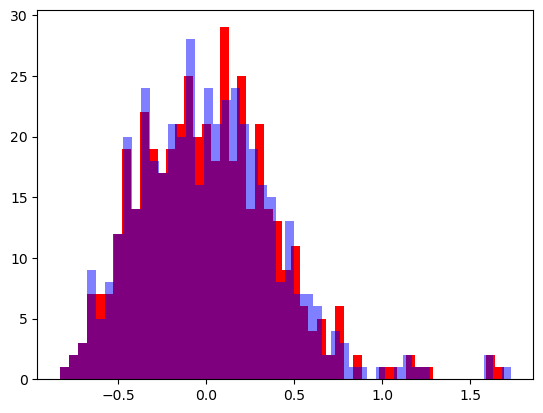

In [114]:
plt.hist(e2, bins = 50, color="r")
plt.hist(e, bins = 50, color="b", alpha=0.5)

In [117]:
print(np.linalg.norm(e), np.linalg.norm(e2))

8.207466203684081 8.2174214753629
